
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
#
# Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD


In [16]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder()
(x_train,_), (x_test,_) = mnist.load_data()


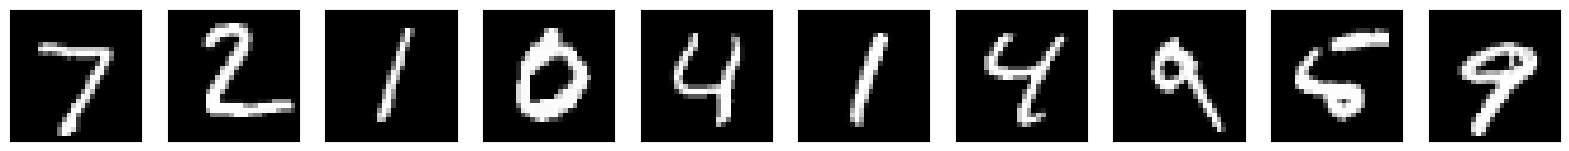

In [17]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [18]:
# Normalize train data - Divide by 255

x_train_normalized = x_train / 255.0



# Normalize test data - Divide by 255

x_test_normalized = x_test / 255.0


## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [5]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400, activation= "relu"))
encoder.add(Dense(200, activation= "sigmoid"))
encoder.add(Dense(100, activation= "sigmoid"))
encoder.add(Dense(50, activation= "sigmoid"))
encoder.add(Dense(25, activation= "relu"))




In [6]:
# print the encoder model
print(encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
Total params: 420625 (1.60 MB)
Trainable params: 420625 

In [7]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
decoder.add(Dense(400, activation= "relu"))
decoder.add(Dense(200, activation= "sigmoid"))
decoder.add(Dense(100, activation= "sigmoid"))


#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [8]:
# print the decoder model
print(decoder.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 400)               20400     
                                                                 
 dense_7 (Dense)             (None, 200)               80200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 784)               79184     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 201184 (785.88 KB)
Trainable params: 201

In [9]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [10]:
# print the autoencoder model
print(autoencoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                420625    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            201184    
                                                                 
Total params: 621809 (2.37 MB)
Trainable params: 621809 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [12]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.

autoencoder.fit(x_train, x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10


469/469 [==============================] - 22s 29ms/step - loss: -420.6987 - accuracy: 0.0187 - val_loss: -504.7347 - val_accuracy: 0.0030
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: -497.4636 - accuracy: 0.0027 - val_loss: -504.7467 - val_accuracy: 0.0024
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: -497.4713 - accuracy: 0.0025 - val_loss: -504.7497 - val_accuracy: 0.0022
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: -497.4732 - accuracy: 0.0024 - val_loss: -504.7517 - val_accuracy: 0.0022
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: -497.4741 - accuracy: 0.0023 - val_loss: -504.7516 - val_accuracy: 0.0021
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: -497.4739 - accuracy: 0.0023 - val_loss: -504.7512 - val_accuracy: 0.0021
Epoch 7/10
469/469 [==============================] - 15s 31ms/step - loss: -497.4747 - accuracy: 

313/313 [==============================] - 4s 9ms/step


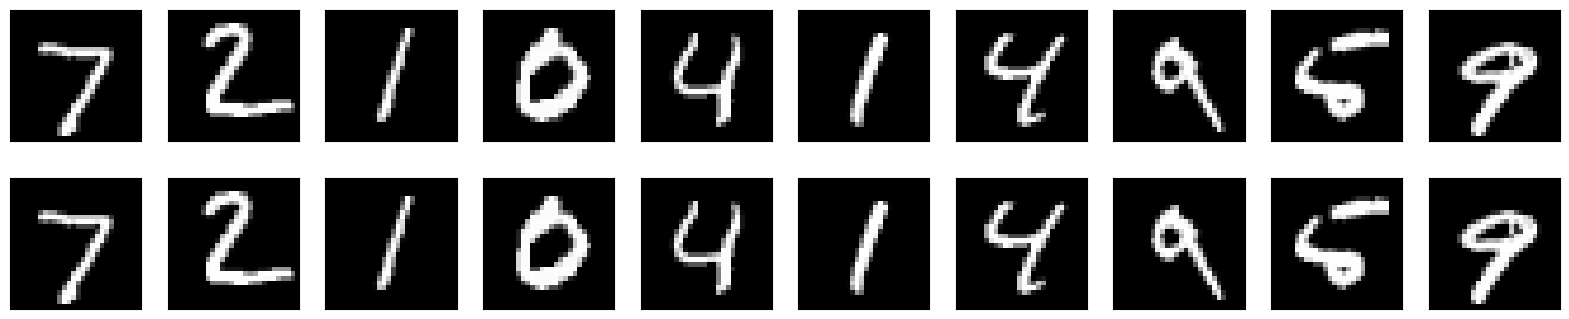

In [13]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image - Just line dample code provided earlier
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed (decoded) images.
    ax = plt.subplot(2, n, i + 1 +n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    

    

plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [21]:
sample = GaussianNoise(0.2)
noisey = sample(x_test_normalized[0:2],training=True)

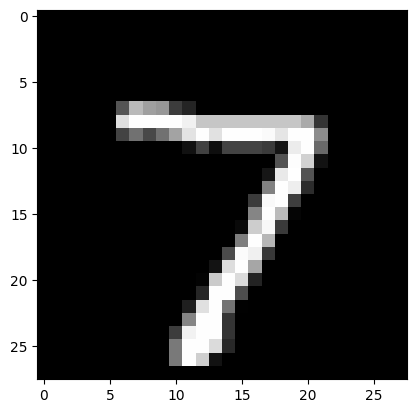

In [22]:
plt.imshow(x_test[0])

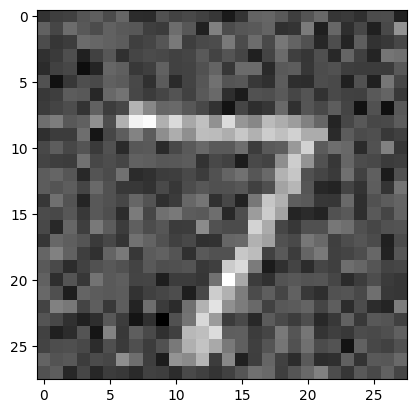

In [23]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [24]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
encoder.add(Dense(400, activation= "relu"))
encoder.add(Dense(200, activation= "sigmoid"))
encoder.add(Dense(100, activation= "sigmoid"))
encoder.add(Dense(50, activation= "sigmoid"))
encoder.add(Dense(25, activation= "relu"))

#


In [25]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
decoder.add(Dense(400, activation= "relu"))
decoder.add(Dense(200, activation= "sigmoid"))
decoder.add(Dense(100, activation= "sigmoid"))

#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [26]:
noise_remover = Sequential([encoder, decoder])

In [27]:
# Compile the network as earlier
autoencoder.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])


In [29]:
# Fit the network as earlier.
autoencoder.fit(x_train, x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 18s 27ms/step - loss: -497.4738 - accuracy: 0.0019 - val_loss: -504.7522 - val_accuracy: 0.0017
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: -497.4745 - accuracy: 0.0023 - val_loss: -504.7517 - val_accuracy: 0.0026
Epoch 3/10
469/469 [==============================] - 13s 29ms/step - loss: -497.4744 - accuracy: 0.0027 - val_loss: -504.7517 - val_accuracy: 0.0027
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: -497.4744 - accuracy: 0.0028 - val_loss: -504.7520 - val_accuracy: 0.0027
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: -497.4745 - accuracy: 0.0036 - val_loss: -504.7507 - val_accuracy: 0.0034
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: -497.4745 - accuracy: 0.0036 - val_loss: -504.7515 - val_accuracy: 0.0034
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: -497.4746 - accuracy: 0.

In [33]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

TypeError: Exception encountered when calling layer 'gaussian_noise_2' (type GaussianNoise).

Cannot convert 0.0 to EagerTensor of dtype uint8

Call arguments received by layer 'gaussian_noise_2' (type GaussianNoise):
  • inputs=tf.Tensor(shape=(10, 28, 28), dtype=uint8)
  • training=True

The Original


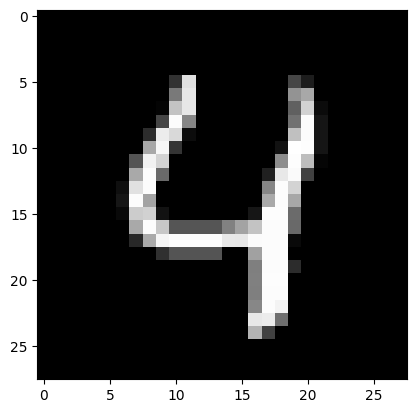

The Noisey Version


NameError: name 'ten_noisey_images' is not defined

In [32]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.